# Bangladesh Students - EDA + Regressão Linear + Random Forest

**Fonte:** https://www.kaggle.com/datasets/satayjit/student-performance-bd/data

O conjunto de dados é destinado ao uso em pesquisas educacionais, projetos de aprendizado de máquina e análises estatísticas para identificar tendências e insights acionáveis para melhorar o sucesso dos estudantes em Bangladesh.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bd_students_per.csv')
df.head(3)

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce


## EDA

In [3]:
df.shape

(8612, 24)

In [4]:
new_df = df.drop(['id', 'full_name'], axis=1)
new_df.head(3)

,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,guardian,parental_involvement,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,16,Male,Urban,6,SSC,HSC,No,No,Father,Yes,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,18,Female,Rural,6,SSC,HSC,No,Yes,Father,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,15,Male,Rural,4,SSC,SSC,Yes,Yes,Father,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce


In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          8612 non-null   int64 
 1   gender                       8612 non-null   object
 2   location                     8611 non-null   object
 3   family_size                  8612 non-null   int64 
 4   mother_education             8602 non-null   object
 5   father_education             8608 non-null   object
 6   mother_job                   8612 non-null   object
 7   father_job                   8612 non-null   object
 8   guardian                     8612 non-null   object
 9   parental_involvement         8612 non-null   object
 10  internet_access              8612 non-null   object
 11  studytime                    8612 non-null   int64 
 12  tutoring                     8612 non-null   object
 13  school_type                  8612

In [6]:
new_df[['mother_education', 'father_education']].isnull().sum()

,0
mother_education,10
father_education,4


In [7]:
mother_education = new_df['mother_education'].unique()
print ('Valores em mother_education:')
print (mother_education)

father_education = new_df['father_education'].unique()
print ('Valores em father_education:')
print (father_education)

Valores em mother_education:
['SSC' 'Honors' 'HSC' 'Diploma' 'Masters' 'Under_SSC' 'Hons'
 'Non_Educated' nan]
Valores em father_education:
['HSC' 'SSC' 'Masters' 'Diploma' 'Honors' 'Hons' 'Under_SSC'
 'Non_Educated' nan]


In [8]:
new_df = new_df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8599 entries, 0 to 8611
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          8599 non-null   int64 
 1   gender                       8599 non-null   object
 2   location                     8599 non-null   object
 3   family_size                  8599 non-null   int64 
 4   mother_education             8599 non-null   object
 5   father_education             8599 non-null   object
 6   mother_job                   8599 non-null   object
 7   father_job                   8599 non-null   object
 8   guardian                     8599 non-null   object
 9   parental_involvement         8599 non-null   object
 10  internet_access              8599 non-null   object
 11  studytime                    8599 non-null   int64 
 12  tutoring                     8599 non-null   object
 13  school_type                  8599 non-

In [9]:
new_df.duplicated().value_counts()

,count
False,8289
True,310


In [10]:
new_df.drop_duplicates(inplace=True)

**Gênero e localização:**

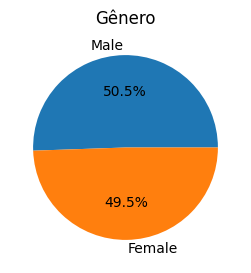

In [11]:
plt.figure(figsize=(5,3))
ax1 = plt.pie(new_df['gender'].value_counts(),
        labels = new_df['gender'].value_counts().index,
        autopct = '%1.1f%%')
plt.title('Gênero')
plt.show(ax1)

In [12]:
new_df['location'].unique()

array(['Urban', 'Rural', 'City', 'urban', 'city'], dtype=object)

In [13]:
new_df['location'] = new_df['location'].replace(['urban'], 'Urban')
new_df['location'] = new_df['location'].replace(['city'], 'City')
new_df['location'].unique()

array(['Urban', 'Rural', 'City'], dtype=object)

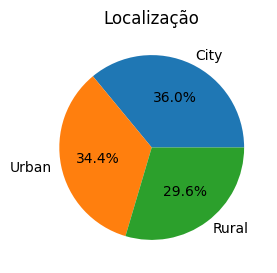

In [14]:
plt.figure(figsize=(5,3))
ax2 = plt.pie(new_df['location'].value_counts(),
        labels = new_df['location'].value_counts().index,
              autopct = '%1.1f%%')
plt.title('Localização')
plt.show(ax2)

**Envolvimento parental nos estudos:**

In [15]:
new_df['stu_group'].unique()

array(['Science', 'Commerce', 'Arts', 'science', 'commerce', 'arts'],
      dtype=object)

In [16]:
new_df['stu_group'] = new_df['stu_group'].replace(['science'], 'Science')
new_df['stu_group'] = new_df['stu_group'].replace(['commerce'], 'Commerce')
new_df['stu_group'] = new_df['stu_group'].replace(['arts'], 'Arts')
new_df['stu_group'].unique()

array(['Science', 'Commerce', 'Arts'], dtype=object)

In [17]:
new_df['school_type'].unique()

array(['Private', 'Semi_Govt', 'Govt'], dtype=object)

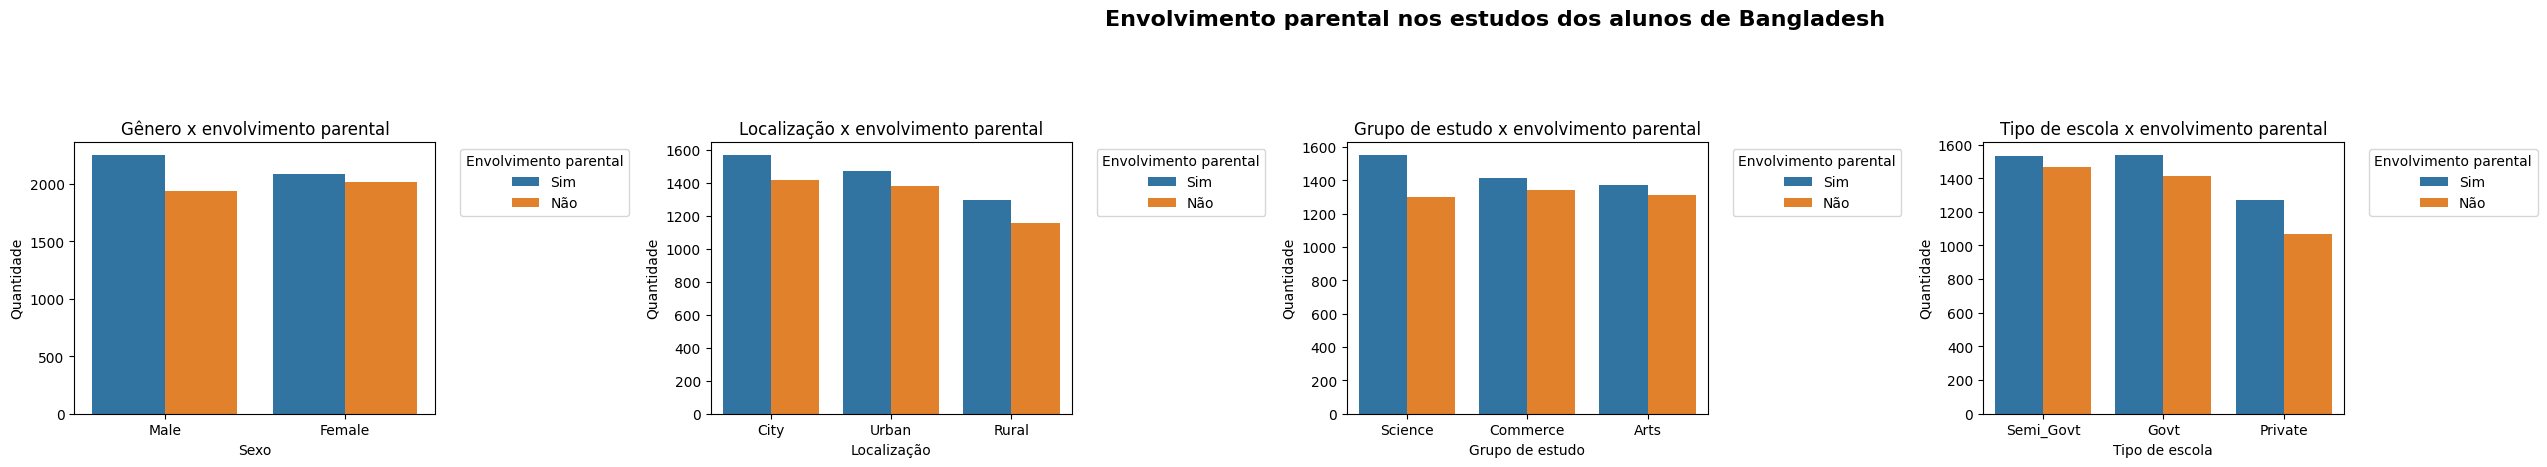

In [18]:
plt.figure(figsize=(30, 30))

plt.subplot(9, 5, 1)
order = new_df.groupby('gender').size().sort_values(ascending=False).index
ax3 = sns.countplot(data=new_df, x='gender', hue='parental_involvement',
                    order = order)
ax3.set_xlabel('Sexo')
ax3.set_ylabel('Quantidade')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, ['Sim', 'Não'], title="Envolvimento parental",
           bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.set_title("Gênero x envolvimento parental")

plt.subplot(9, 5, 2)
order = new_df.groupby('location').size().sort_values(ascending=False).index
ax4 = sns.countplot(data=new_df, x='location', hue='parental_involvement',
                    order = order)
ax4.set_xlabel('Localização')
ax4.set_ylabel('Quantidade')
handles, labels = ax3.get_legend_handles_labels()
ax4.legend(handles, ['Sim', 'Não'], title="Envolvimento parental",
           bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.set_title("Localização x envolvimento parental")

plt.subplot(9, 5, 3)
order = new_df.groupby('stu_group').size().sort_values(ascending=False).index
ax5 = sns.countplot(data=new_df, x='stu_group', hue='parental_involvement',
                    order = order)
ax5.set_xlabel('Grupo de estudo')
ax5.set_ylabel('Quantidade')
handles, labels = ax3.get_legend_handles_labels()
ax5.legend(handles, ['Sim', 'Não'], title="Envolvimento parental",
           bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.set_title("Grupo de estudo x envolvimento parental")

plt.subplot(9, 5, 4)
order = new_df.groupby('school_type').size().sort_values(ascending=False).index
ax6 = sns.countplot(data=new_df, x='school_type', hue='parental_involvement',
                    order = order)
ax6.set_xlabel('Tipo de escola')
ax6.set_ylabel('Quantidade')
handles, labels = ax3.get_legend_handles_labels()
ax6.legend(handles, ['Sim', 'Não'], title="Envolvimento parental",
           bbox_to_anchor=(1.05, 1), loc='upper left')
ax6.set_title("Tipo de escola x envolvimento parental")

plt.suptitle('Envolvimento parental nos estudos dos alunos de Bangladesh',
             fontsize=16, fontweight='bold', y=1.02, ha='center')
plt.tight_layout()
plt.show()

O envolvimento parental é constante nos estudos dos alunos de Bangladesh.

**Análise descritiva:**

In [19]:
new_df.describe().round(2)

,age,family_size,studytime,attendance,english,math,science,social_science,art_culture
count,8289.00,8289.00,8289.00,8289.00,8289.00,8289.00,8289.00,8289.00,8289.00
mean,16.59,4.50,4.73,73.93,73.60,72.91,73.53,74.47,76.28
std,0.94,1.67,2.20,13.27,15.46,15.94,15.23,15.12,13.72
min,10.00,0.00,1.00,30.00,18.00,33.00,33.00,36.00,36.00
25%,16.00,3.00,3.00,63.00,63.00,64.00,63.00,65.00,69.00
50%,17.00,5.00,5.00,73.00,75.00,73.00,75.00,77.00,77.00
75%,17.00,6.00,6.00,85.00,85.00,84.00,85.00,86.00,87.00
max,24.00,11.00,16.00,100.00,100.00,100.00,100.00,100.00,100.00


**Análise das notas:**

In [20]:
english = math = new_df['english'].mean()
print('A média de notas de inglês é de:', round(english, 2))
math = new_df['math'].mean()
print('A média de notas de matemática é de:', round(math, 2))
science = new_df['science'].mean()
print('A média de notas de ciências é de:', round(science, 2))
social_science = new_df['social_science'].mean()
print('A média de notas de ciências sociais é de:', round(social_science, 2))
art = new_df['art_culture'].mean()
print('A média de notas de artes é de:', round(art, 2))

A média de notas de inglês é de: 73.6
A média de notas de matemática é de: 72.91
A média de notas de ciências é de: 73.53
A média de notas de ciências sociais é de: 74.47
A média de notas de artes é de: 76.28


In [21]:
studytime = new_df['studytime'].mean()
print('A média de tempo de estudo dos alunos de Bangladesh é de (horas):', round(studytime, 0))

A média de tempo de estudo dos alunos de Bangladesh é de (horas): 5.0


**Distribuição das notas:**

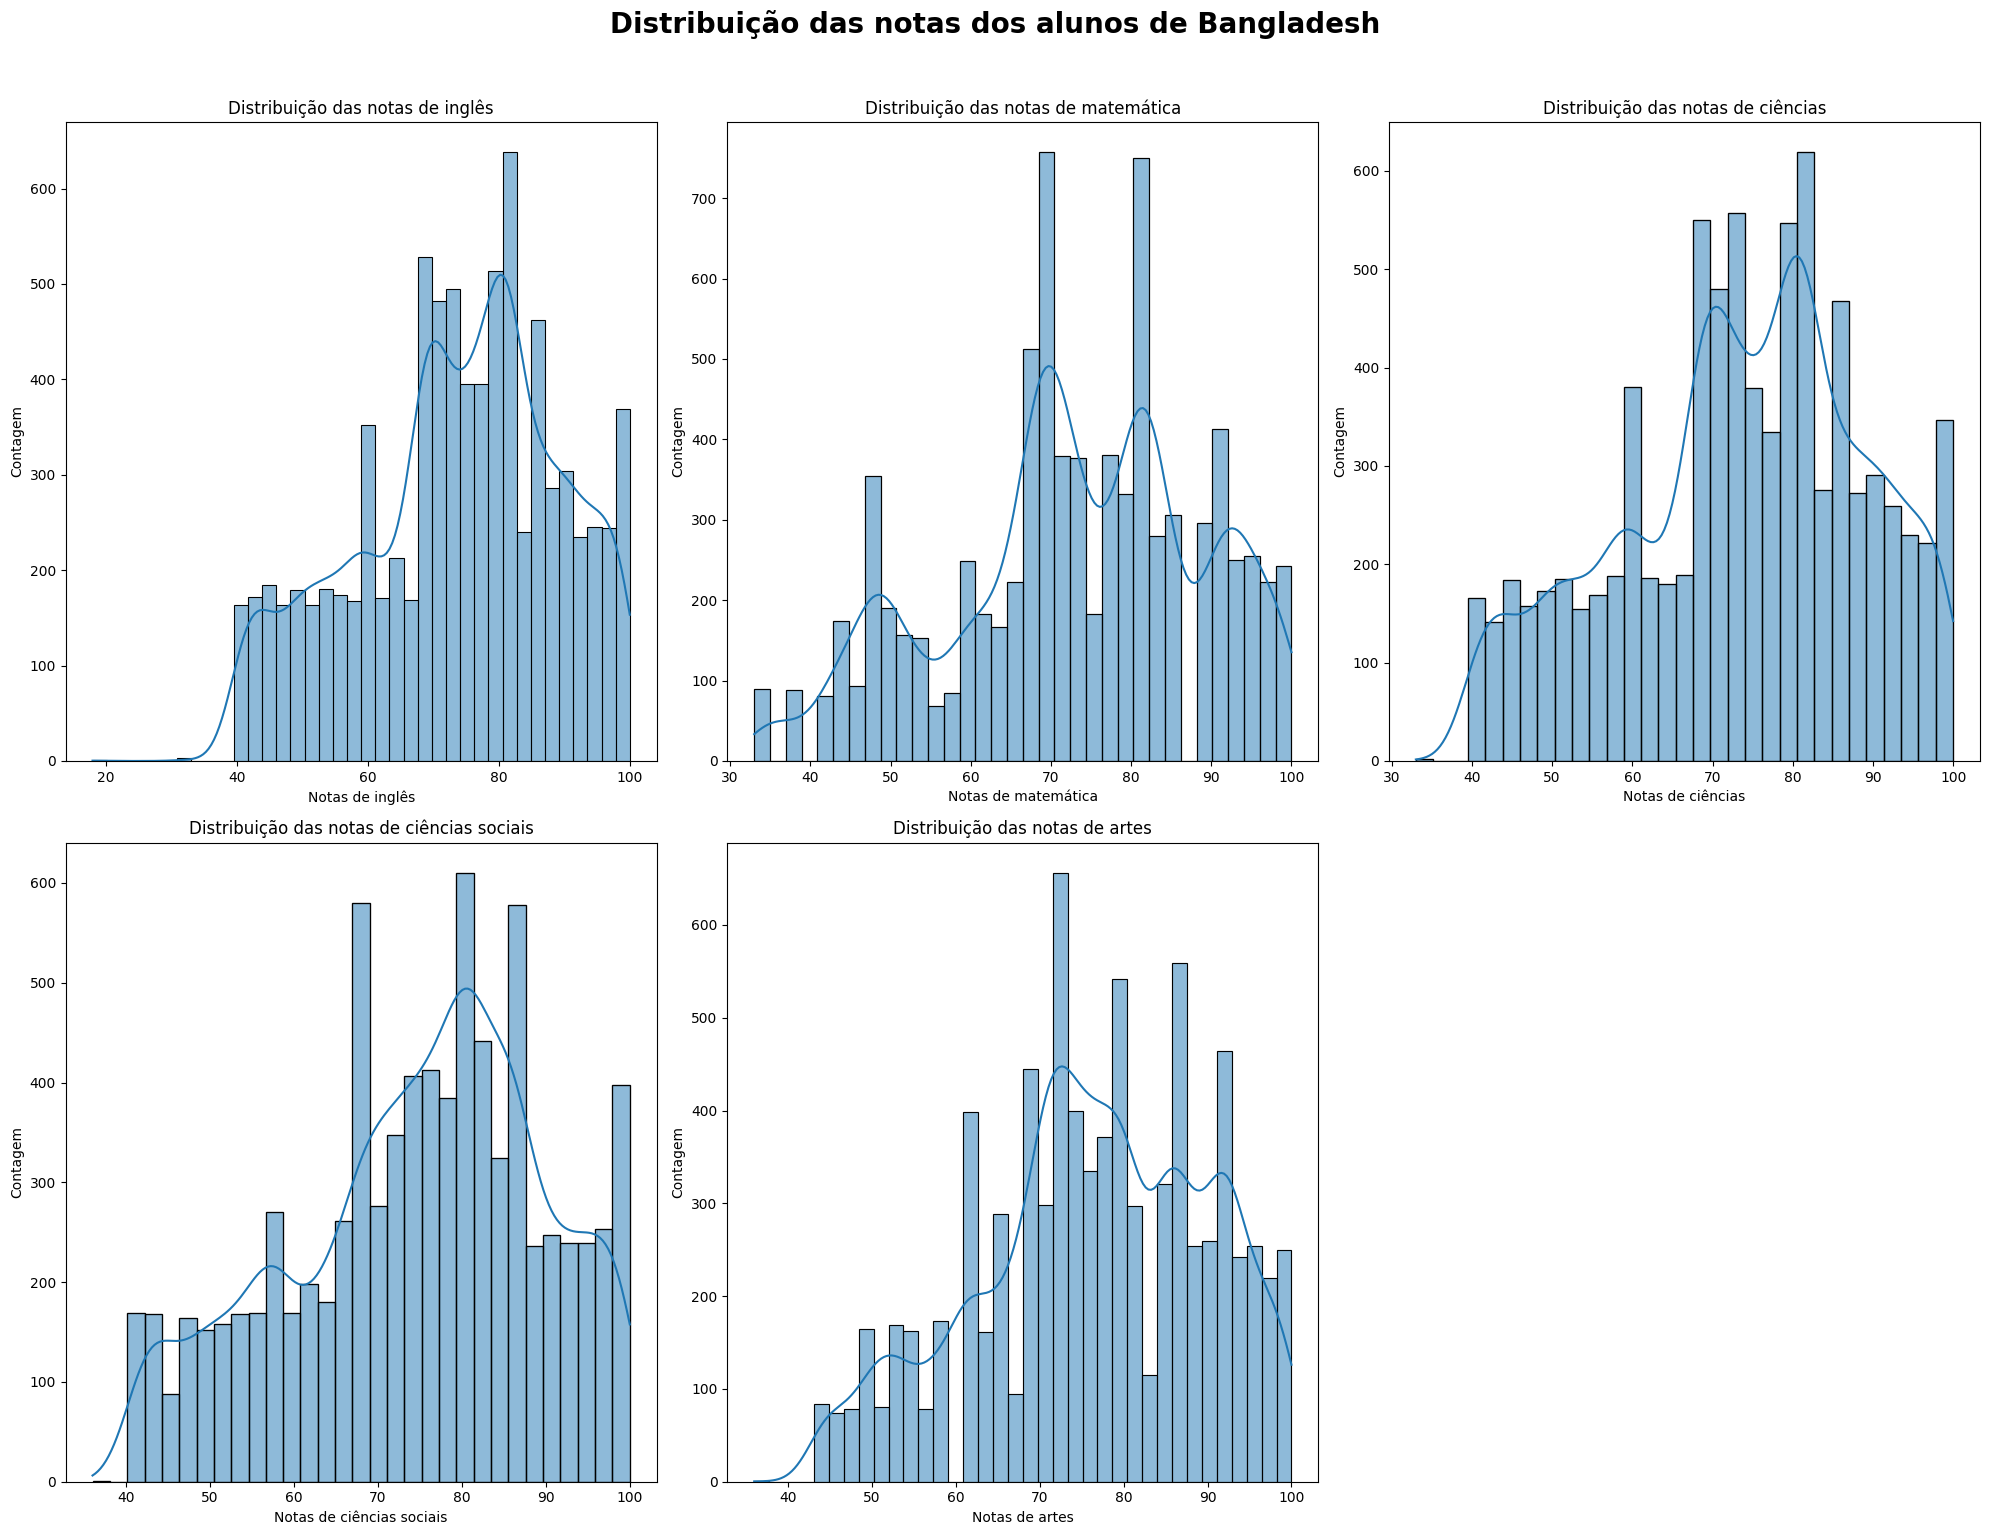

In [22]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
ax7 = sns.histplot(new_df['english'], kde=True)
ax7.set_title('Distribuição das notas de inglês')
ax7.set_xlabel('Notas de inglês')
ax7.set_ylabel('Contagem')


plt.subplot(2, 3, 2)
ax8 = sns.histplot(new_df['math'], kde=True)
ax8.set_title('Distribuição das notas de matemática')
ax8.set_xlabel('Notas de matemática')
ax8.set_ylabel('Contagem')

plt.subplot(2, 3, 3)
ax9 = sns.histplot(new_df['science'], kde=True)
ax9.set_title('Distribuição das notas de ciências')
ax9.set_xlabel('Notas de ciências')
ax9.set_ylabel('Contagem')

plt.subplot(2, 3, 4)
ax10 = sns.histplot(new_df['social_science'], kde=True)
ax10.set_title('Distribuição das notas de ciências sociais')
ax10.set_xlabel('Notas de ciências sociais')
ax10.set_ylabel('Contagem')

plt.subplot(2, 3, 5)
ax11 = sns.histplot(new_df['art_culture'], kde=True)
ax11.set_title('Distribuição das notas de artes')
ax11.set_xlabel('Notas de artes')
ax11.set_ylabel('Contagem')

plt.suptitle('Distribuição das notas dos alunos de Bangladesh',
             fontsize=20, fontweight='bold', y=1.02, ha='center')
plt.tight_layout()
plt.show()

**Correlação entre tempo de estudo X notas:**

Correlação entre tempo de estudo e notas de inglês: 0.79
Correlação entre tempo de estudo e notas de matemática: 0.78
Correlação entre tempo de estudo e notas de ciências: 0.79
Correlação entre tempo de estudo e notas de ciências sociais: 0.77
Correlação entre tempo de estudo e notas de artes: 0.75


<Figure size 800x400 with 0 Axes>

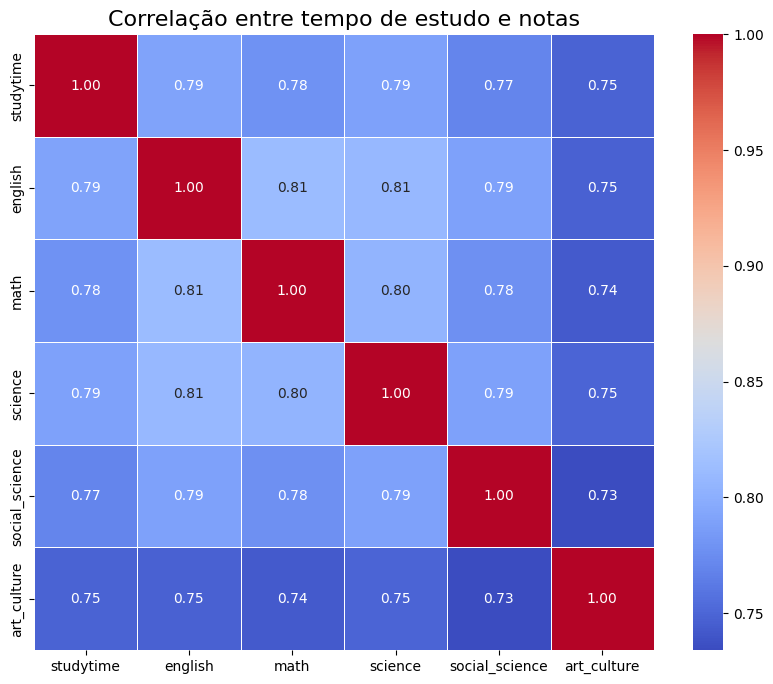

In [23]:
plt.figure(figsize=(8, 4))

corr_english = new_df['studytime'].corr(new_df['english'])
corr_math = new_df['studytime'].corr(new_df['math'])
corr_science = new_df['studytime'].corr(new_df['science'])
corr_sscience = new_df['studytime'].corr(new_df['social_science'])
corr_art = new_df['studytime'].corr(new_df['art_culture'])

print(f'Correlação entre tempo de estudo e notas de inglês: {corr_english:.2f}')
print(f'Correlação entre tempo de estudo e notas de matemática: {corr_math:.2f}')
print(f'Correlação entre tempo de estudo e notas de ciências: {corr_science:.2f}')
print(f'Correlação entre tempo de estudo e notas de ciências sociais: {corr_sscience:.2f}')
print(f'Correlação entre tempo de estudo e notas de artes: {corr_art:.2f}')

cols_of_interest = ['studytime', 'english', 'math', 'science', 'social_science', 'art_culture']
correlation_matrix = new_df[cols_of_interest].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre tempo de estudo e notas', fontsize=16)
plt.show()

O tempo de estudo influencia nas notas, assim como uma nota possui correlação com a outra.

### Prevendo o tempo de estudo de um aluno com base em suas notas.


**Utilização de Regressão Linear**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X = new_df[['english', 'math', 'science', 'social_science', 'art_culture']]
y = new_df['studytime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [27]:
X_train.shape
print('Tamanho do X de treino:', X_train.shape)
X_test.shape
print('Tamanho do X de teste:', X_test.shape)

y_train.shape
print('Tamanho do y de treino:', y_train.shape)
y_test.shape
print('Tamanho do y de teste:', y_test.shape)

Tamanho do X de treino: (6631, 5)
Tamanho do X de teste: (1658, 5)
Tamanho do y de treino: (6631,)
Tamanho do y de teste: (1658,)


In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'R²: {r2 * 100:.2f}%')

Erro Quadrático Médio (MSE): 1.32
R²: 72.52%


O MSE pode ser considerado moderado, mas o R² acima de 70% indica que o modelo é capaz de explicar uma boa parte da variação no tempo de estudo.

**Visualização do modelo de Regressão Linear:**

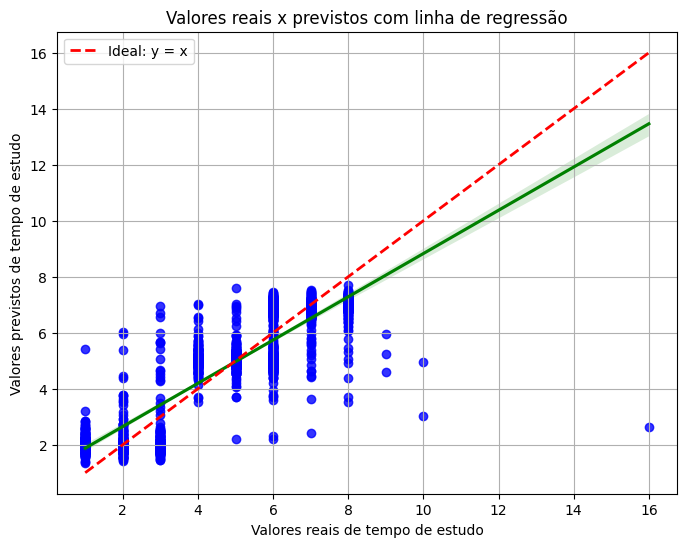

In [35]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2, linestyle='--', label='Ideal: y = x')
plt.title('Valores reais x previstos com linha de regressão')
plt.xlabel('Valores reais de tempo de estudo')
plt.ylabel('Valores previstos de tempo de estudo')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest:**

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
X = new_df[['english', 'math', 'science', 'social_science', 'art_culture']]  # Variáveis independentes (notas)
y = new_df['studytime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [33]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {rf_mse:.2f}')
print(f'R²: {rf_r2*100:.2f}%')

Erro Quadrático Médio (MSE): 1.19
R²: 75.23%


O Random Forest parece ser uma boa escolha em relação à regressão linear, pois apresenta um R² mais alto (indicando melhor desempenho) e um MSE mais baixo (indicando que as previsões são mais precisas).

**Visualização do modelo de Random Forest:**

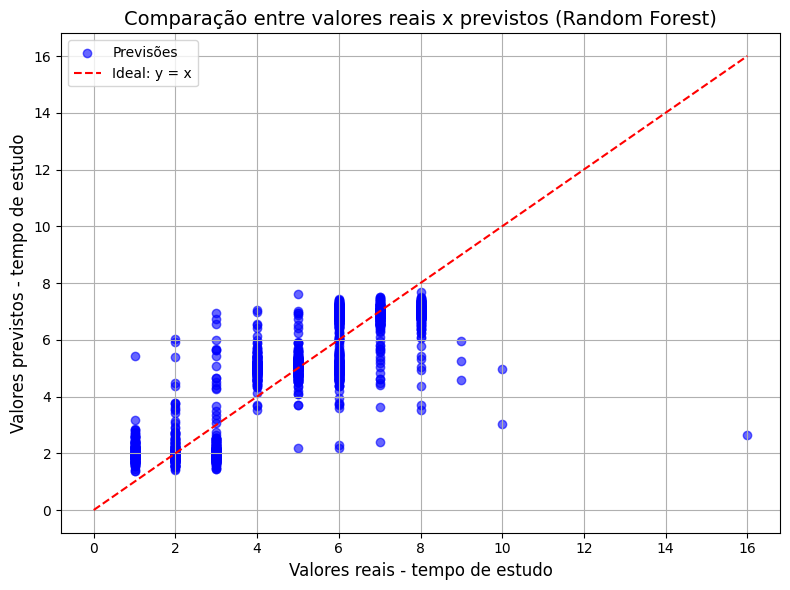

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Previsões')
plt.plot([0, 16], [0, 16], color='red', linestyle='--', label='Ideal: y = x')
plt.title('Comparação entre valores reais x previstos (Random Forest)', fontsize=14)
plt.xlabel('Valores reais - tempo de estudo', fontsize=12)
plt.ylabel('Valores previstos - tempo de estudo', fontsize=12)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()